In [22]:
#Import and classes
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

def pwm_control(w_desired,w_measured,Kp,Ki,e_sum):
    
    duty_cycle = min(max(0,Kp*(w_desired-w_measured) + Ki*e_sum),1)
    e_sum = e_sum + w_desired-w_measured
    
    return duty_cycle, e_sum

def motor_simulator(w,duty_cycle):

    I = 5
    dt = 0.1
    d = 1
    
    torque = I*duty_cycle

    if (w > 0):
        w = min(w + dt*(torque - d*w),3)
    elif (w < 0):
        w = max(w + dt*(torque - d*w),-3)
    else:
        w = w + dt*(torque)

    return w

class DiffDriveRobot:
    
    def __init__(self,inertia=5, dt=0.1, drag=0.2, wheel_radius=0.05, wheel_sep=0.15):
        
        self.x = 0.6 # y-position
        self.y = 0.3 # y-position 
        self.th = 90 # orientation
        
        self.wl = 0.0 #rotational velocity left wheel
        self.wr = 0.0 #rotational velocity right wheel
        
        self.I = inertia
        self.d = drag
        self.dt = dt
        
        self.r = wheel_radius
        self.l = wheel_sep
    
    # Should be replaced by motor encoder measurement which measures how fast wheel is turning
    # Here, we simulate the real system and measurement
    def motor_simulator(self,w,duty_cycle):
        
        torque = self.I*duty_cycle
        
        if (w > 0):
            w = min(w + self.dt*(torque - self.d*w),3)
        elif (w < 0):
            w = max(w + self.dt*(torque - self.d*w),-3)
        else:
            w = w + self.dt*(torque)
        
        return w
    
    # Veclocity motion model
    def base_velocity(self,wl,wr):
        
        v = (wl*self.r + wr*self.r)/2.0
        
        w = (wl*self.r - wr*self.r)/self.l
        
        return v, w
    
    # Kinematic motion model
    def pose_update(self,duty_cycle_l,duty_cycle_r):
        
        self.wl = self.motor_simulator(self.wl,duty_cycle_l)
        self.wr = self.motor_simulator(self.wr,duty_cycle_r)
        
        v, w = self.base_velocity(self.wl,self.wr)
        
        self.x = self.x + self.dt*v*np.cos(self.th)
        self.y = self.y + self.dt*v*np.sin(self.th)
        self.th = self.th + w*self.dt
        
        return self.x, self.y, self.th
        
class RobotController:
    
    def __init__(self,Kp=0.1,Ki=0.01,wheel_radius=0.02, wheel_sep=0.1):
        
        self.Kp = Kp
        self.Ki = Ki
        self.r = wheel_radius
        self.l = wheel_sep
        self.e_sum_l = 0
        self.e_sum_r = 0
        
    def p_control(self,w_desired,w_measured,e_sum):
        
        duty_cycle = min(max(-1,self.Kp*(w_desired-w_measured) + self.Ki*e_sum),1)
        
        e_sum = e_sum + (w_desired-w_measured)
        
        return duty_cycle, e_sum
        
        
    def drive(self,v_desired,w_desired,wl,wr):
        
        wl_desired = (v_desired + self.l*w_desired/2)/self.r
        wr_desired = (v_desired - self.l*w_desired/2)/self.r
        
        duty_cycle_l,self.e_sum_l = self.p_control(wl_desired,wl,self.e_sum_l)
        duty_cycle_r,self.e_sum_r = self.p_control(wr_desired,wr,self.e_sum_r)
        
        return duty_cycle_l, duty_cycle_r
        


class TentaclePlanner:
    
    def __init__(self,obstacles,dt=0.1,steps=7):
        
        self.dt = dt
        self.steps = steps
        # Tentacles are possible trajectories to follow
        self.tentacles = [(0.1,0.0),(0.0,0.0)] ##Change to directions
        self.directions = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        self.obstacles = obstacles
    
    
    # Play a trajectory and evaluate where you'd end up

    #PLAN: change v,w to a direction, then simple check if there are any obstacles  in that direction
    # Can keep time steps to evaluate cost(e.g going slightly left then having to turn is better than immediately redirecting)
    def roll_out(self,direction,goal_x,goal_y,x,y,th):
        
        for j in range(self.steps):
                x = x + self.dt*0.1*np.cos(direction)
                y = y + self.dt*0.1*np.sin(direction)
                if (self.check_collision(x,y)):
                    return np.inf
        
        return (goal_x-x)**2 + (goal_y-y)**2

    def check_collision(self,x,y):
        min_obstacle_dist = np.min(np.sqrt((x-self.obstacles[:,0])**2+(y-self.obstacles[:,1])**2))

        if (min_obstacle_dist < 0.15):
            return True
        return False
    
    # Choose trajectory that will get you closest to the goal
    # PLAN: keep same, cost modify tentacles
    def plan(self,goal_x,goal_y,x,y,th):
        
        costs =[]
        for direction in self.directions:
            costs.append(self.roll_out(direction,goal_x,goal_y,x,y,th))
        
        best_idx = np.argmin(costs)
        return self.directions[best_idx]
    
    
        

(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)

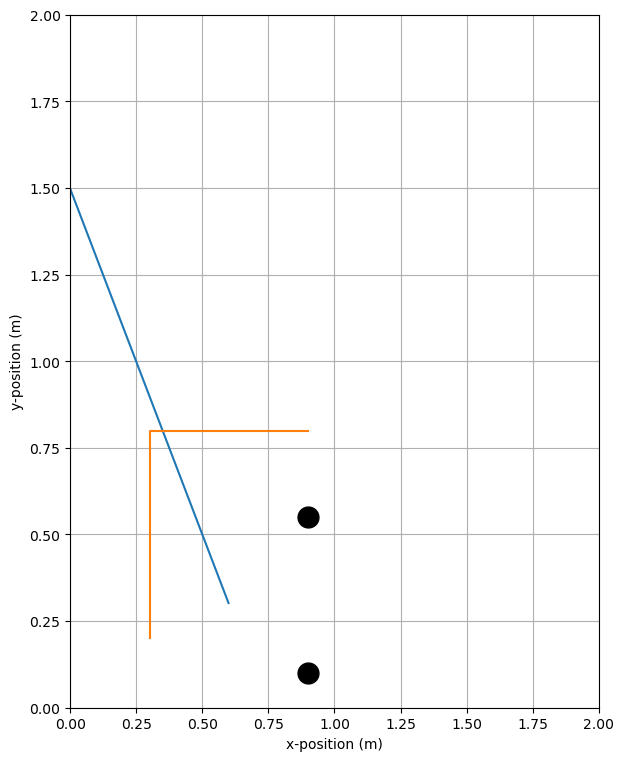

In [23]:
robot = DiffDriveRobot(inertia=5, dt=0.1, drag=1, wheel_radius=0.05, wheel_sep=0.15)
controller = RobotController(Kp=1,Ki=0.25,wheel_radius=0.05,wheel_sep=0.15)
obstacles = np.array([[0.9,0.55],[0.9,0.1]])
planner = TentaclePlanner(obstacles, dt=0.1,steps=5)

plt.figure(figsize=(15,9))

poses = []
velocities = []
duty_cycle_commands = []
goals = np.array([[0.3,0.2],
                 [0.3,0.8],
                 [0.9,0.8]])
goal_stage = 0
goal_x = goals[goal_stage,0]
goal_y = goals[goal_stage,1]

for i in range(2000):
    

    # Plan using tentacles
    direction = planner.plan(goal_x,goal_y,robot.x,robot.y,robot.th)
    print(direction)
    duty_cycle_l,duty_cycle_r = controller.drive(v,w,robot.wl,robot.wr)
    
    # Simulate robot motion - send duty cycle command to robot
    x,y,th = robot.pose_update(duty_cycle_l,duty_cycle_r)

    #Check if we reach a goal.
    if (np.sqrt((x-goal_x)**2+(y-goal_y)**2)<0.08):
        print(x,y)
        print(goal_x,goal_y)
        if(goal_stage == 2):
            print('Final Goal Reached')
            break
        else:
            print(f'Goal {goal_stage+1} reached.')
            goal_stage = goal_stage + 1
            goal_x = goals[goal_stage,0]
            goal_y = goals[goal_stage,1]


    
    # Log data
    poses.append([x,y,th])
    duty_cycle_commands.append([duty_cycle_l,duty_cycle_r])
    velocities.append([robot.wl,robot.wr])
    
# Plot robot data
plt.clf()
plt.subplot(1,2,1)   
plt.plot(np.array(poses)[:,0],np.array(poses)[:,1])
plt.plot(x,y,'k',marker='+')
plt.plot(goals[:,0],goals[:,1])
plt.plot(obstacles[:,0],obstacles[:,1],'ko',markersize=15)
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.grid()
plt.show()

    
    